In [1]:
import pandas as pd


data = pd.read_csv('../data/DATA PENELITIAN GINA.csv', delimiter=";")

print(data.shape)
data

(254, 8)


,NO,NAMA,NILAI SKP,ORIENTASI,INTEGRITAS,KOMITMEN,DISIPLIN,KERJASAMA
0,1,ADAM,96.70,91.00,90.00,90.00,91.00,90.00
1,2,AGUS KUSUMA WARDANA,83.67,90.00,85.00,80.00,85.00,85.00
2,3,AGUS SOFYAN,89.52,84.00,85.00,85.00,85.00,84.00
3,4,AHYAR,88.67,91.00,82.00,85.00,85.00,81.00
4,5,AMRIN JAYA WARDI,85.45,78.00,83.00,77.00,78.00,78.00
...,...,...,...,...,...,...,...,...
249,250,Musleh,84.00,84.00,84.00,84.17,83.67,84.17
250,251,Fitra Hadi,88.00,86.00,86.05,87.42,86.28,88.77
251,252,Zulkarnaen M,89.00,86.00,86.00,86.00,86.00,86.00
252,253,Nur Sahan,82.00,84.83,85.00,85.17,84.17,85.17


In [3]:
datax = data[['NILAI SKP', 'ORIENTASI', 'INTEGRITAS', 'KOMITMEN', 'DISIPLIN', 'KERJASAMA']]
print(datax.head())

   NILAI SKP  ORIENTASI  INTEGRITAS  KOMITMEN  DISIPLIN  KERJASAMA
0      96.70       91.0        90.0      90.0      91.0       90.0
1      83.67       90.0        85.0      80.0      85.0       85.0
2      89.52       84.0        85.0      85.0      85.0       84.0
3      88.67       91.0        82.0      85.0      85.0       81.0
4      85.45       78.0        83.0      77.0      78.0       78.0


In [3]:
datax.describe(include="all")
# data.mean()

,NILAI SKP,ORIENTASI,INTEGRITAS,KOMITMEN,DISIPLIN,KERJASAMA
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,87.057874,83.953740,83.097047,82.903346,83.286732,83.071929
std,5.854388,4.169743,3.197799,3.145452,3.285836,3.379888
min,48.170000,77.500000,77.000000,77.000000,77.500000,76.000000
25%,85.330000,80.582500,80.542500,80.372500,80.500000,80.500000
50%,86.570000,83.000000,82.170000,82.000000,83.000000,82.000000
75%,88.352500,86.480000,85.000000,85.000000,85.187500,85.000000
max,130.920000,99.000000,93.000000,91.000000,93.000000,95.000000


In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(datax)
centroid = kmeans.cluster_centers_

print(centroid)

[[88.94495413 87.55862385 85.73568807 85.65174312 86.28036697 86.05045872]
 [85.63931034 81.24386207 81.11351724 80.83731034 81.03634483 80.83289655]]


In [5]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [6]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    # Calculate Euclidean distance for each data point assigned to centroid 
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    # return the mean value
    return np.mean(distances)

c_mean_distances = []
for i, (cx, cy) in enumerate(centroid):
    mean_distance = k_mean_distance(datax, cx, cy, i, kmeans.labels_)
    c_mean_distances.append(mean_distance)

print(c_mean_distances)

ValueError: too many values to unpack (expected 2)

In [22]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

euc_res = euclidean_distances(np.array(centroid), np.array(datax))
print(len(euc_res))
normalized_res = (1/euc_res)/((1/euc_res).sum())
normalized_res_list=normalized_res.tolist()
print(len(normalized_res_list))
sorted_res=sorted(normalized_res.all(), reverse=True)

nearest_cluster=[]
for i in sorted_res:
    nearest_cluster.append(normalized_res_list.index(i))

print(nearest_cluster)

2
2


TypeError: 'numpy.bool_' object is not iterable

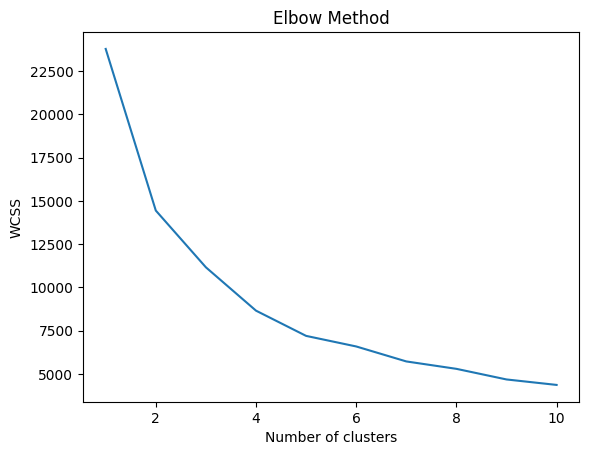

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(datax)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

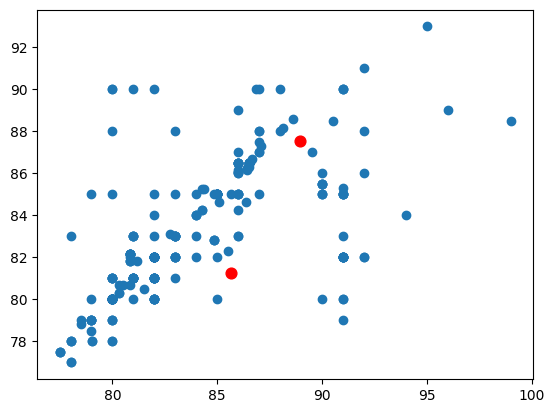

In [7]:
kmm = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmm.fit_predict(datax)
plt.scatter(datax['ORIENTASI'], datax['INTEGRITAS'])
plt.scatter(kmm.cluster_centers_[:, 0], kmm.cluster_centers_[:, 1], s=60, c='red')
plt.show()

In [21]:
for i in range(datax.shape[0]):
    # datax['LABEL'] = kmeans.labels_[i]
    if kmeans.labels_[i] == 0:
        print("Cluster Satu : ", datax.iloc[i])

Cluster Satu :  NILAI SKP     85.53
ORIENTASI     83.00
INTEGRITAS    82.00
KOMITMEN      82.00
DISIPLIN      82.00
KERJASAMA     82.00
Name: 9, dtype: float64
Cluster Satu :  NILAI SKP     85.33
ORIENTASI     82.00
INTEGRITAS    80.00
KOMITMEN      80.00
DISIPLIN      80.00
KERJASAMA     82.00
Name: 20, dtype: float64
Cluster Satu :  NILAI SKP     85.33
ORIENTASI     81.00
INTEGRITAS    81.00
KOMITMEN      81.00
DISIPLIN      81.00
KERJASAMA     81.00
Name: 21, dtype: float64
Cluster Satu :  NILAI SKP     76.19
ORIENTASI     80.00
INTEGRITAS    80.00
KOMITMEN      80.00
DISIPLIN      80.00
KERJASAMA     80.00
Name: 24, dtype: float64
Cluster Satu :  NILAI SKP     85.33
ORIENTASI     81.00
INTEGRITAS    81.00
KOMITMEN      80.00
DISIPLIN      81.00
KERJASAMA     81.00
Name: 25, dtype: float64
Cluster Satu :  NILAI SKP     85.53
ORIENTASI     82.00
INTEGRITAS    82.00
KOMITMEN      82.00
DISIPLIN      81.00
KERJASAMA     83.00
Name: 26, dtype: float64
Cluster Satu :  NILAI SKP     84.32

In [6]:
# datax['LABEL']=kmeans.labels_
labels_ = kmeans.labels_
print(labels_)

[0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0
 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1]


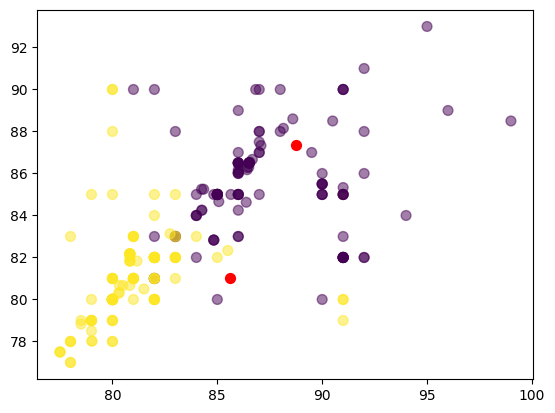

In [41]:
plt.scatter(datax['ORIENTASI'], datax['INTEGRITAS'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', s=50)
plt.show()

In [42]:
centroid[:,1]

array([87.36222222, 81.04284672])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datax, labels_, test_size=0.2, random_state=42)

In [8]:
import numpy as np

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#loop over k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    #computasi training dan test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

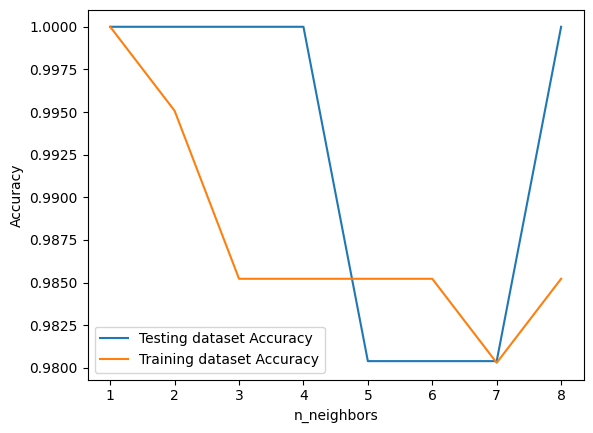

In [9]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
#calculate the accuracy of the model
print(knn.score(X_test, y_test))

1.0


In [11]:
knn_m = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_m.fit(X_train, y_train)

y_predict = knn.predict(X_test)

In [12]:
print(y_predict)

[0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 0 1 1 1 1]


In [13]:
knn_m.score(X_test, y_test)

1.0

In [19]:
# menampilkan jarak antar data
dist, ind = knn_m.kneighbors(X_train)
distance = [dist[i][0] for i in range(len(dist))]

print(dist)
print("+"*20)
print(ind)
print("+"*20)
print(distance)

[[ 0.          2.35333805  3.44106088]
 [ 0.          0.35        1.66565303]
 [ 0.         15.69397655 31.65906505]
 [ 0.          1.04790267  1.98584994]
 [ 0.          1.08724422  1.15182464]
 [ 0.          1.9908792   2.06794584]
 [ 0.          0.          0.        ]
 [ 0.          0.          2.24590739]
 [ 0.          1.04        2.72442655]
 [ 0.          0.          1.75544866]
 [ 0.          0.          1.08355895]
 [ 0.          1.          1.        ]
 [ 0.          0.25        1.00179838]
 [ 0.          1.14564392  1.34257216]
 [ 0.          0.65        1.79203795]
 [ 0.          0.3         1.0004499 ]
 [ 0.          2.04259639  2.22022521]
 [ 0.          0.33        1.6640012 ]
 [ 0.         27.52904103 28.43628844]
 [ 0.          0.35        1.87427319]
 [ 0.          0.          1.08461975]
 [ 0.          1.41435498  1.7910053 ]
 [ 0.          7.43323617  8.02459345]
 [ 0.          2.24281074  3.71531964]
 [ 0.          0.          0.        ]
 [ 0.          1.04790267

In [24]:
sa_1 = [87.15, 90.43, 79.32, 99.67, 88.54, 89.]
# print(centroid)
# for n in centroid:
    # print(n - sa_1)

c_1 = centroid[0] - datax
print(c_1)

     NILAI SKP  ORIENTASI  INTEGRITAS  KOMITMEN  DISIPLIN  KERJASAMA
0    -7.755046  -3.441376   -4.264312 -4.348257 -4.719633  -3.949541
1     5.274954  -2.441376    0.735688  5.651743  1.280367   1.050459
2    -0.575046   3.558624    0.735688  0.651743  1.280367   2.050459
3     0.274954  -3.441376    3.735688  0.651743  1.280367   5.050459
4     3.494954   9.558624    2.735688  8.651743  8.280367   8.050459
..         ...        ...         ...       ...       ...        ...
249   4.944954   3.558624    1.735688  1.481743  2.610367   1.880459
250   0.944954   1.558624   -0.314312 -1.768257  0.000367  -2.719541
251  -0.055046   1.558624   -0.264312 -0.348257  0.280367   0.050459
252   6.944954   2.728624    0.735688  0.481743  2.110367   0.880459
253   3.944954   7.558624    5.735688  5.651743  6.280367   6.050459

[254 rows x 6 columns]


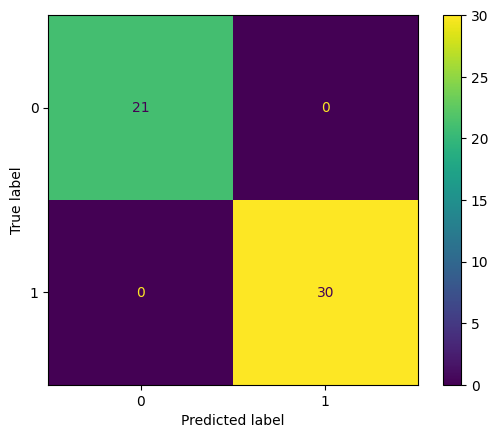

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [40]:
## save model
import joblib

name_model = 'knn_model_v2.0.sav' # model v2 using k=3 n acc 100%, v1 using k=5 n acc=98%
joblib.dump(knn_m, open(name_model, 'wb'))

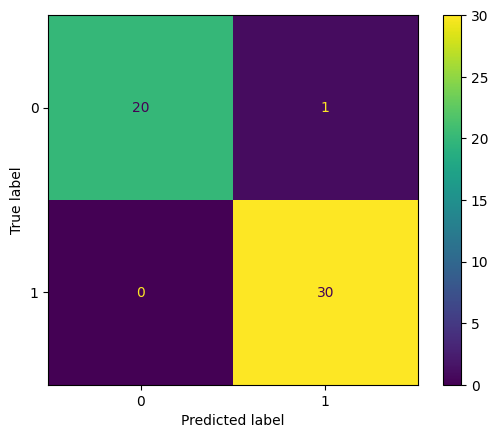

In [34]:
# load model 
load_model = joblib.load(open(name_model, 'rb'))
# this model using k = 5
load_y_pred = load_model.predict(X_test)

kcm = confusion_matrix(y_test, load_y_pred)
tampilkan = ConfusionMatrixDisplay(kcm).plot()

In [15]:
print(type(X_train))
print(X_test)

print( y_test)

<class 'pandas.core.frame.DataFrame'>
     NILAI SKP  ORIENTASI  INTEGRITAS  KOMITMEN  DISIPLIN  KERJASAMA
190      88.00      86.52       86.50     86.35     86.30      86.88
6        87.60      88.60       88.60     88.60     88.60      88.60
79       80.60      80.00       80.00     85.00     85.00      80.00
205      86.00      80.83       82.17     81.50     80.50      80.50
117      90.54      82.00       81.00     82.00     91.00      82.00
185      85.00      87.00       87.00     87.00     87.00      86.58
201      87.00      81.17       81.83     81.50     81.00      81.67
167      95.00      95.00       93.00     90.00     90.00      95.00
9        85.53      83.00       82.00     82.00     82.00      82.00
30       90.66      81.00       90.00     81.00     86.00      81.00
180      88.00      85.00       85.00     85.00     85.00      85.00
220      87.00      78.50       78.83     78.33     81.00      80.00
228      85.00      80.83       82.17     81.50     80.50      80

In [43]:
prediksi_test = load_model.predict([[98.86, 85.87, 99.23, 80.56, 75.93, 88.45],[76.86, 65.77, 83.23, 80.56, 70.93, 88.45]])
print(prediksi_test)

[0 1]


c:\Users\junanda\worEx\env\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [5]:
df_test = pd.DataFrame(columns=['NILAI SKP', 'ORIENTASI', 'INTEGRITAS', 'KOMITMEN', 'DISIPLIN', 'KERJASAMA'])
print(df_test)
data_tst = [[98.86, 85.87, 99.23, 80.56, 75.93, 88.45],[76.86, 65.77, 83.23, 80.56, 70.93, 88.45]]
for i in range(len(data_tst)):
    df_test.loc[i] = data_tst[i]

print(df_test)

Empty DataFrame
Columns: [NILAI SKP, ORIENTASI, INTEGRITAS, KOMITMEN, DISIPLIN, KERJASAMA]
Index: []
   NILAI SKP  ORIENTASI  INTEGRITAS  KOMITMEN  DISIPLIN  KERJASAMA
0      98.86      85.87       99.23     80.56     75.93      88.45
1      76.86      65.77       83.23     80.56     70.93      88.45


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        30

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

